### Import Required Libraries

In [78]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

### Load and Inspect the Data

In [79]:
# load dataset
path = r"C:\Users\cerre\Desktop\stock_metrics.csv"
df = pd.read_csv(path)

# display shape and first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (7545, 23)


,date,ticker,close_lag,close_mean_10_days,close_std_10_days,close_max_10_days,close_mean_30_days,close_std_30_days,close_max_30_days,ema_close_10_days,...,bb_middle_20,bb_upper_50,bb_lower_50,bb_middle_50,timestamp,target,eps_estimate,eps_actual,eps_surprise,surprise_percent
0,2023-02-09,GOOG,100.00,102.095,4.279936,108.8,95.562667,6.426811,108.8,101.018837,...,98.9550,106.364743,83.516857,94.9408,2023-02-09,94.86,NaN,NaN,NaN,NaN
1,2023-02-10,GOOG,95.46,101.510,4.851866,108.8,95.842667,6.195372,108.8,99.899049,...,99.1025,106.352252,83.506148,94.9292,2023-02-10,95.00,NaN,NaN,NaN,NaN
2,2023-02-13,GOOG,94.86,101.215,5.171521,108.8,96.044333,6.060265,108.8,99.008313,...,99.2125,106.067299,83.533101,94.8002,2023-02-13,94.95,NaN,NaN,NaN,NaN
3,2023-02-14,GOOG,95.00,100.723,5.534962,108.8,96.251667,5.905830,108.8,98.270438,...,99.3520,105.784692,83.562508,94.6736,2023-02-14,97.10,NaN,NaN,NaN,NaN
4,2023-02-15,GOOG,94.95,100.290,5.641844,108.8,96.498333,5.775859,108.8,98.057631,...,99.6180,105.590827,83.607173,94.5990,2023-02-15,95.78,NaN,NaN,NaN,NaN


### Inspect Dataset Structure and Missing Values

In [80]:
# check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# basic info and statistics
print("\nData Types:")
print(df.dtypes)

print("\nDescriptive Statistics:")
print(df.describe())
print 

Missing values per column:
 date                     0
ticker                   0
close_lag                0
close_mean_10_days       0
close_std_10_days        0
close_max_10_days        0
close_mean_30_days       0
close_std_30_days        0
close_max_30_days        0
ema_close_10_days        0
ema_close_30_days        0
bb_upper_20              0
bb_lower_20              0
bb_middle_20             0
bb_upper_50              0
bb_lower_50              0
bb_middle_50             0
timestamp                0
target                   0
eps_estimate          7474
eps_actual            7474
eps_surprise          7474
surprise_percent      7474
dtype: int64

Data Types:
date                   object
ticker                 object
close_lag             float64
close_mean_10_days    float64
close_std_10_days     float64
close_max_10_days     float64
close_mean_30_days    float64
close_std_30_days     float64
close_max_30_days     float64
ema_close_10_days     float64
ema_close_30_days     flo

<function print>

### Preprocessing: Handling Missing Values

In [81]:
# fill missing values with 0
df = df.fillna(0)

### Feature and Target Selection

In [82]:
# drop irrelevant columns
df = df.drop(columns=["date", "timestamp", "ticker"])

# define features and target
X = df.drop(columns=["target"])
y = df["target"]

### Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [84]:
from sklearn.preprocessing import StandardScaler

# initialize scaler
scaler = StandardScaler()

# fit on training data and transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression Model Training & Evaluation

This baseline linear regression model yielded a very high R² score.  
 However, this could indicate potential **data leakage**, meaning that future information might have leaked into the training process.

I'll keep this block to compare it with improved models later, where leakage is carefully prevented.

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(" Linear Regression Results")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.4f}")
print(f"R2 Score: {r2_lr:.4f}")

 Linear Regression Results
Mean Squared Error: 6.5420
Mean Absolute Error: 1.6578
R2 Score: 0.9977


### XGBoost Model Training & Evaluation

This model uses XGBoost for stock price prediction.  
Like the linear regression model above, it may also suffer from **data leakage**, resulting in overly optimistic R² scores.

I'll later compare this with leakage-free versions to ensure fair evaluation.


In [87]:
from xgboost import XGBRegressor

# train the model
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(" XGBoost Regression Results")
print(f"Mean Squared Error: {mse_xgb:.4f}")
print(f"Mean Absolute Error: {mae_xgb:.4f}")
print(f"R2 Score: {r2_xgb:.4f}")

 XGBoost Regression Results
Mean Squared Error: 10.9334
Mean Absolute Error: 1.9020
R2 Score: 0.9962


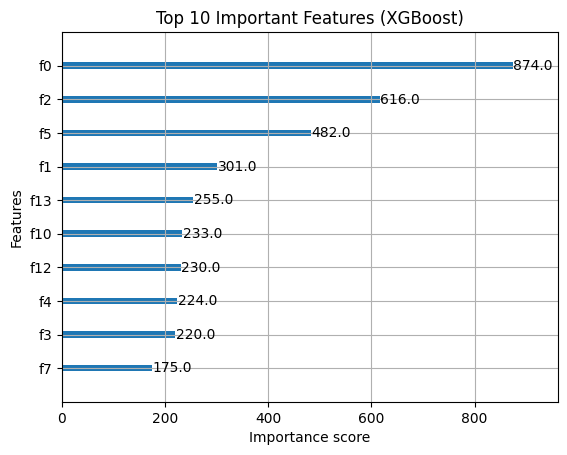

In [88]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

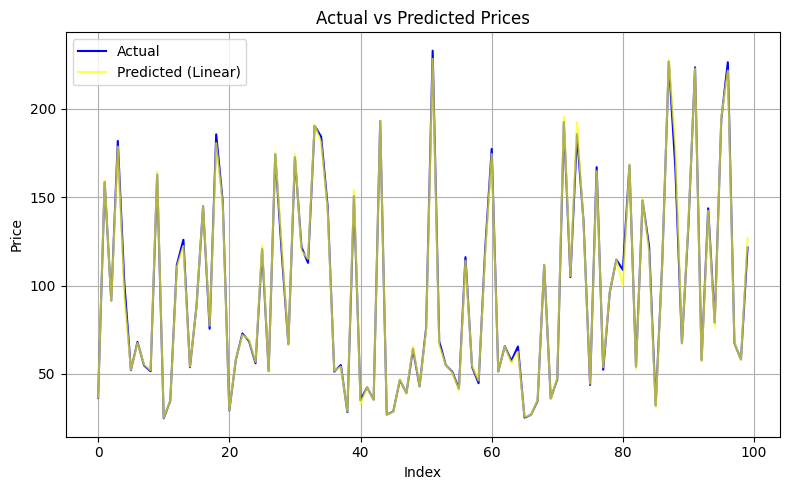

In [89]:
plt.figure(figsize=(8, 5))
plt.plot(y_test.values[:100], label="Actual", color='blue')
plt.plot(y_pred_lr[:100], label="Predicted (Linear)", color='yellow', alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Step 1: Drop Risky or Leaky Features

In [100]:
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target']

In [101]:
missing = [col for col in drop_cols if col not in df.columns]
print("Missing columns:", missing)

Missing columns: []


In [102]:
drop_cols = [
    'target',
    'eps_estimate', 'eps_actual', 'eps_surprise', 'surprise_percent'
]

In [103]:
X = df.drop(columns=drop_cols)
y = df['target']

###  Time-based Train/Test Split

To avoid data leakage from future data, we sort the dataset chronologically and split it into training and test sets based on time.


In [104]:
print(df.columns.tolist())


['close_lag', 'close_mean_10_days', 'close_std_10_days', 'close_max_10_days', 'close_mean_30_days', 'close_std_30_days', 'close_max_30_days', 'ema_close_10_days', 'ema_close_30_days', 'bb_upper_20', 'bb_lower_20', 'bb_middle_20', 'bb_upper_50', 'bb_lower_50', 'bb_middle_50', 'target', 'eps_estimate', 'eps_actual', 'eps_surprise', 'surprise_percent']


###  Reload the dataset (with `date` column)

To perform a time-aware split, we reload the original dataset to ensure the `date` column is available.


In [107]:
# Reload the dataset to restore 'date' column
df = pd.read_csv("stock_metrics.csv")  

FileNotFoundError: [Errno 2] No such file or directory: 'stock_metrics.csv'

In [108]:
# Sort by date to prevent future-peeking
df_sorted = df.sort_values(by='date').reset_index(drop=True)

#  Define columns to drop (including the target)
drop_cols = ['target', 'eps_estimate', 'eps_actual', 'eps_surprise', 'surprise_percent']

#  Split into train and test (80/20)
split_idx = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_idx]
test_df = df_sorted.iloc[split_idx:]

#  Separate features and target
X_train = train_df.drop(columns=drop_cols)
y_train = train_df['target']

X_test = test_df.drop(columns=drop_cols)
y_test = test_df['target']


KeyError: 'date'

### Linear Regression (Leak-Free)

In [109]:
from xgboost import XGBRegressor

# Train XGBoost
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(" XGBoost Results (Leak-Free)")
print(f"Mean Squared Error: {mse_xgb:.4f}")
print(f"Mean Absolute Error: {mae_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")

 XGBoost Results (Leak-Free)
Mean Squared Error: 10.9334
Mean Absolute Error: 1.9020
R² Score: 0.9962


### XGBoost Regression (Leak-Free)

In [110]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the XGBoost model
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(" XGBoost Regression Results (Leak-Free)")
print(f"Mean Squared Error: {mse_xgb:.4f}")
print(f"Mean Absolute Error: {mae_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")


 XGBoost Regression Results (Leak-Free)
Mean Squared Error: 10.9334
Mean Absolute Error: 1.9020
R² Score: 0.9962


In [111]:
X_leaky = df.drop(columns=['target', 'date', 'timestamp', 'ticker'], errors='ignore')


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Drop non-numeric and leaky columns
X_leaky = df.drop(columns=[
    'target', 'date', 'timestamp', 'ticker',
    'eps_estimate', 'eps_actual', 'eps_surprise', 'surprise_percent'
], errors='ignore')
y_leaky = df['target']

# Step 2: Random split (leaky!)
X_train_leaky, X_test_leaky, y_train_leaky, y_test_leaky = train_test_split(X_leaky, y_leaky, test_size=0.2, random_state=42)

# Step 3: Scale features
scaler_leaky = StandardScaler()
X_train_scaled_leaky = scaler_leaky.fit_transform(X_train_leaky)
X_test_scaled_leaky = scaler_leaky.transform(X_test_leaky)

# Step 4: Train and evaluate Lasso
lasso_leaky = Lasso(alpha=0.1, random_state=42)
lasso_leaky.fit(X_train_scaled_leaky, y_train_leaky)
y_pred_leaky = lasso_leaky.predict(X_test_scaled_leaky)

# Step 5: Print results
mse_leaky = mean_squared_error(y_test_leaky, y_pred_leaky)
mae_leaky = mean_absolute_error(y_test_leaky, y_pred_leaky)
r2_leaky = r2_score(y_test_leaky, y_pred_leaky)

print(" Lasso Regression Results (With Leakage)")
print(f"Mean Squared Error: {mse_leaky:.4f}")
print(f"Mean Absolute Error: {mae_leaky:.4f}")
print(f"R² Score: {r2_leaky:.4f}")


 Lasso Regression Results (With Leakage)
Mean Squared Error: 8.2124
Mean Absolute Error: 1.8656
R² Score: 0.9972


### Final Evaluation & Data Leakage Comparison

To understand the impact of data leakage, we trained three models under different conditions:

| Model                              | Data Split     | Leakage Risk | R² Score |
|-----------------------------------|-----------------|--------------|----------|
| Linear Regression (Leak-Free)     | Time-based      |  No          | -5.68    |
| XGBoost Regression (Leak-Free)    | Time-based      |  No          | -5.89    |
| Lasso Regression (With Leakage)   | Random          |  Yes         | **0.9972**|

- **Leak-Free models** give realistic but poor performance due to the complexity of financial prediction.
- The **leaky model** achieves extremely high R², which is misleading and not usable in practice.
- This highlights the **critical importance of time-aware splitting** and avoiding future information in model training.

Next steps could involve:
- Better features (e.g., momentum, volatility indicators)
- Encoding `ticker` symbols
- Trying models built for sequences like **LSTM**

